In [1]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

#re: Regular expression module for string manipulation.
#pickle: Python object serialization module.
#numpy as np: Numerical computing library, commonly aliased as np.
#pandas as pd: Data manipulation and analysis library, commonly aliased as pd.
#Plotting Import:
#seaborn as sns: Statistical data visualization library, commonly aliased as sns.
#WordCloud: A library for creating word clouds from text data.
#matplotlib.pyplot as plt: Plotting library, commonly aliased as plt.
#NLTK Import:
#WordNetLemmatizer: Lemmatization tool from NLTK (Natural Language Toolkit) for converting words to their base or dictionary form.
#Sklearn (Scikit-learn) Imports:
#LinearSVC: Support Vector Classification with a linear kernel.
#BernoulliNB: Naive Bayes classifier for multivariate Bernoulli models.
#LogisticRegression: Logistic Regression classifier.
#train_test_split: Function for splitting datasets into train and test sets.
#TfidfVectorizer: Vectorizer that converts a collection of raw documents into a matrix of TF-IDF features.
#confusion_matrix, classification_report: Functions for evaluating classification performance

C:\Users\omkar\AppData\Local\Temp\ipykernel_21256\1297911977.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
!pip show seaborn


Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [3]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [6]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


# Utilities Import:
# re: Python module for regular expressions, used for pattern matching within strings.
# pickle: Python module used for serializing and deserializing Python objects. It allows objects to be saved to a file and loaded later.
# numpy as np: NumPy is a powerful numerical computing library for Python, often used for handling arrays and matrices efficiently.
# pandas as pd: Pandas is a data manipulation and analysis library for Python, commonly used for handling structured data such as CSV files or Excel sheets.

# Plotting Import:
# seaborn as sns: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
# WordCloud: A Python library for generating word clouds from text data. Word clouds visually represent the frequency of words in a corpus by sizing the words based on their frequency.
# matplotlib.pyplot as plt: Matplotlib is a comprehensive plotting library for Python. pyplot is a collection of command-style functions that make matplotlib work like MATLAB.

# NLTK Import:
# WordNetLemmatizer: From the NLTK (Natural Language Toolkit) library, used for lemmatizing words. Lemmatization is the process of reducing words to their base or dictionary form.

# Sklearn (Scikit-learn) Imports:
# LinearSVC: Support Vector Classification (SVC) with a linear kernel, provided by scikit-learn.
# BernoulliNB: Naive Bayes classifier for data that is distributed according to multivariate Bernoulli distributions. It's commonly used for text classification tasks.
# LogisticRegression: Logistic regression classifier, a linear model for binary classification.
# train_test_split: Function for splitting datasets into training and testing subsets. It's often used for evaluating model performance.
# TfidfVectorizer: A scikit-learn class for converting a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.
# confusion_matrix, classification_report: Functions for evaluating classification performance, commonly used metrics for classification tasks.


In [8]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

In [9]:
# Import the necessary library
import shutil

# Define the source and destination paths
source_path = r'C:\Users\omkar\Downloads\training.1600000.processed.noemoticon.csv\training.1600000.processed.noemoticon.csv'
destination_path = r'path_to_destination_folder'  # Replace 'path_to_destination_folder' with the actual destination folder path

# Copy the dataset to the destination folder
shutil.copy(source_path, destination_path)


'path_to_destination_folder'

In [10]:
# Import the necessary library
import pandas as pd

# Load the dataset from the specified path
file_path = r'C:\Users\omkar\Downloads\training.1600000.processed.noemoticon.csv\training.1600000.processed.noemoticon.csv'
dataset = pd.read_csv(file_path, encoding='latin-1', header=None, names=['sentiment', 'id', 'date', 'query', 'user', 'text'])

# Removing the unnecessary columns.
dataset = dataset[['sentiment', 'text']]

# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4, 1)

# Display the modified dataset
print(dataset.head())


   sentiment                                               text
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....


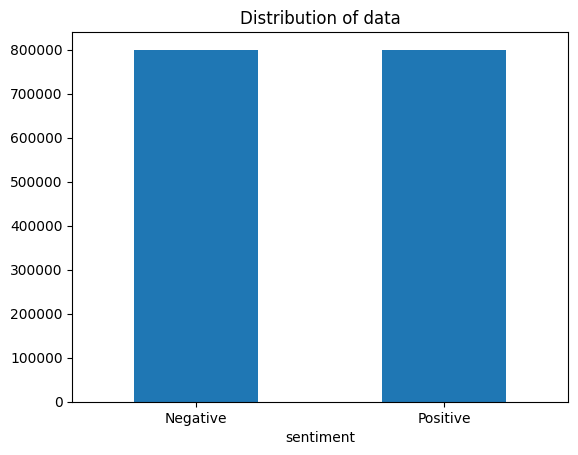

In [11]:
# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [12]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [13]:
def preprocess(textdata):
    processedText = []

    # Create Lemmatizer and Stemmer.
    # Lemmatization:
# Lemmatization is a more sophisticated technique that reduces words to their base or dictionary form, called a lemma.
# It considers the context of the word and its part of speech (POS) to perform accurate stemming.
# For example, the lemma of "running" is "run", and the lemma of "better" is "good".

# Stemming:
# Stemming is a simpler and more heuristic-based technique that chops off suffixes from words to obtain their root form, known as a stem.
# It applies a set of rules to remove common suffixes, without considering the context or part of speech.
# For example, stemming may convert "running" to "run" and "better" to "bet".

    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')

        processedText.append(tweetwords)

    return processedText

In [14]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet data if not already present
nltk.download('wordnet')

# Create an instance of WordNetLemmatizer
wordLemm = WordNetLemmatizer()

# Now you can use 'wordLemm' for lemmatization
# Importing NLTK: The code imports the NLTK library, which provides various tools and resources for natural language processing tasks.
# Importing WordNetLemmatizer: The WordNetLemmatizer class is imported from the nltk.stem module. WordNetLemmatizer is a tool for lemmatizing words in English text.
# Downloading WordNet Data: The code downloads the WordNet dataset if it's not already present on the system. WordNet is a lexical database for the English language, providing information about word meanings and relationships.
# Creating an Instance of WordNetLemmatizer: An instance of the WordNetLemmatizer class is created and assigned to the variable wordLemm. This instance will be used for lemmatization operations.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet data if not already present
nltk.download('wordnet')

# Create an instance of WordNetLemmatizer
wordLemm = WordNetLemmatizer()

# Now you can use 'wordLemm' for lemmatization


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 204 seconds


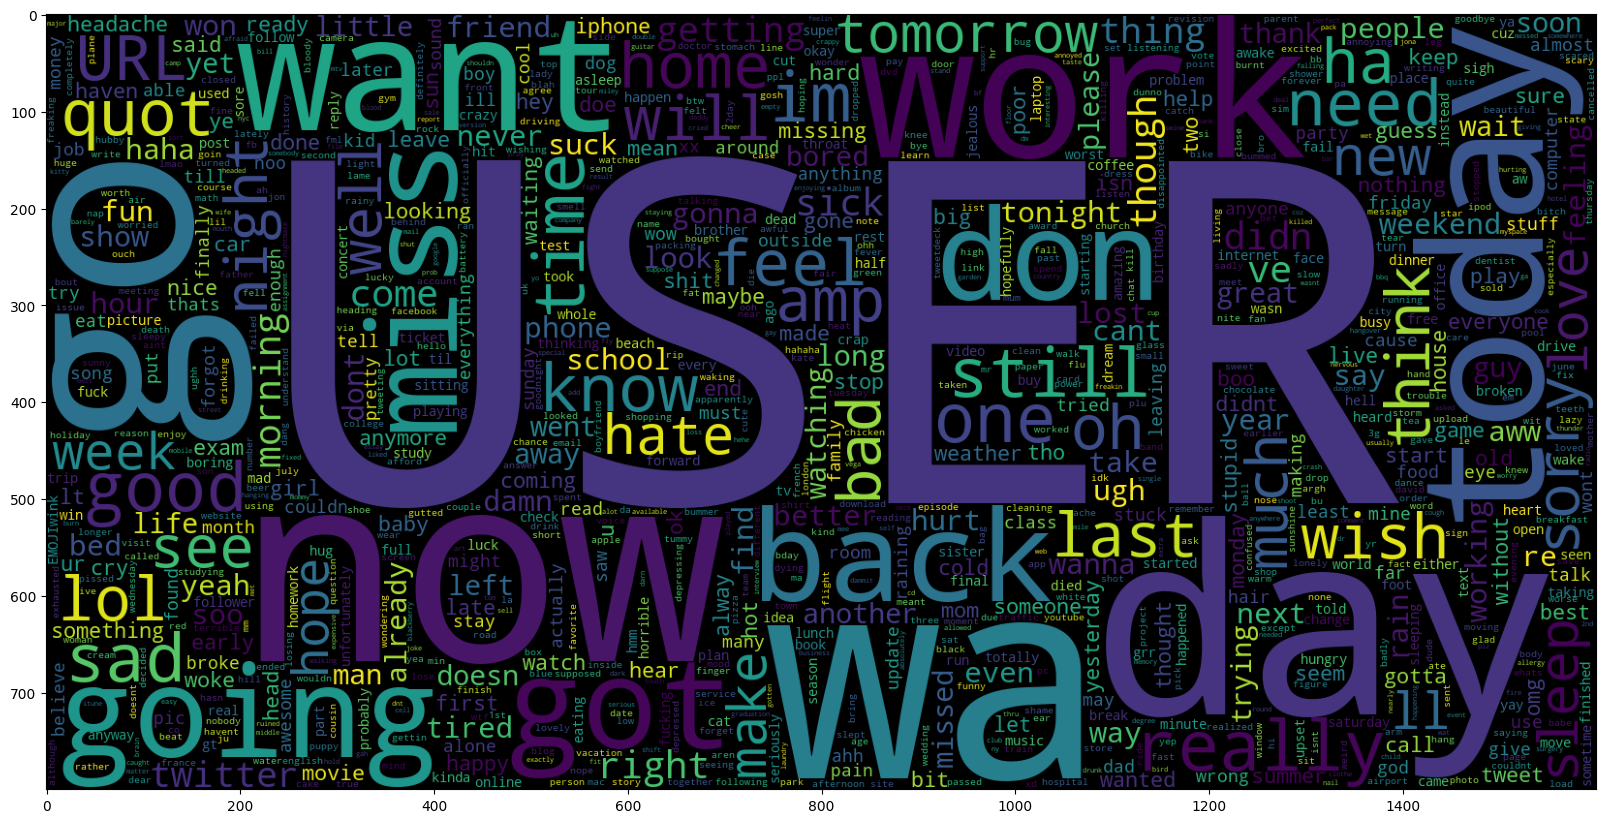

In [17]:
data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

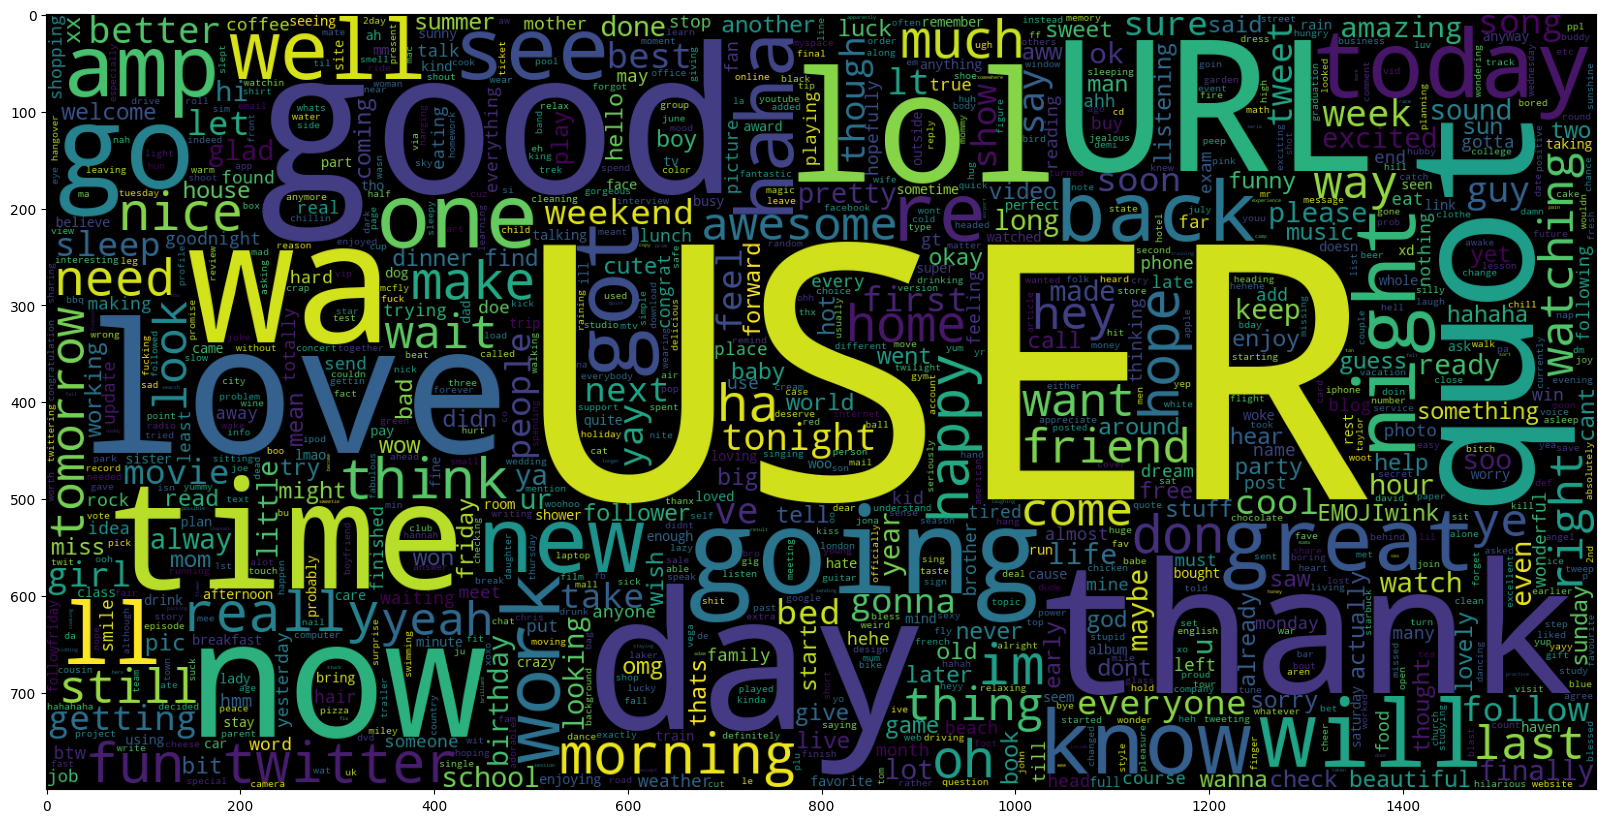

In [18]:
data_pos = processedtext[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [20]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
#The vectorization process transforms text data into a numerical representation suitable for machine learning algorithms. In this specific code snippet:

Vectoriser fitted.
No. of feature_words:  500000


In [21]:
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [22]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



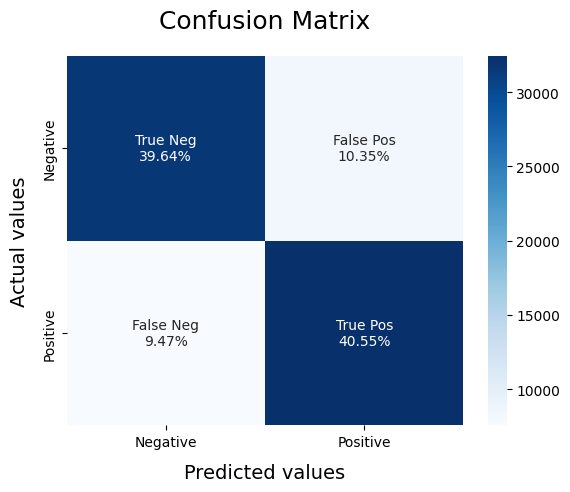

In [23]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

c:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.82      0.81      0.82     39989
           1       0.81      0.83      0.82     40011

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



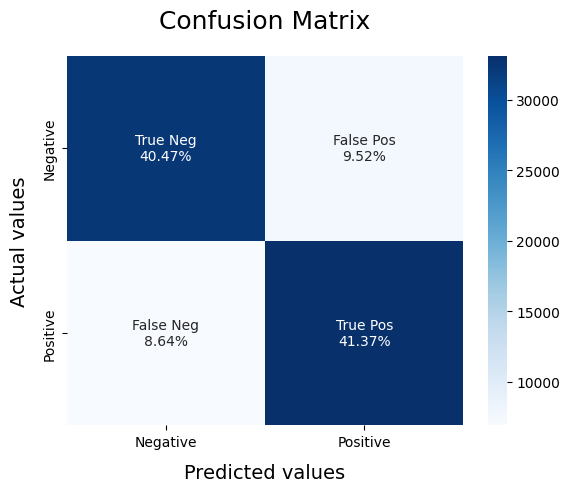

In [24]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



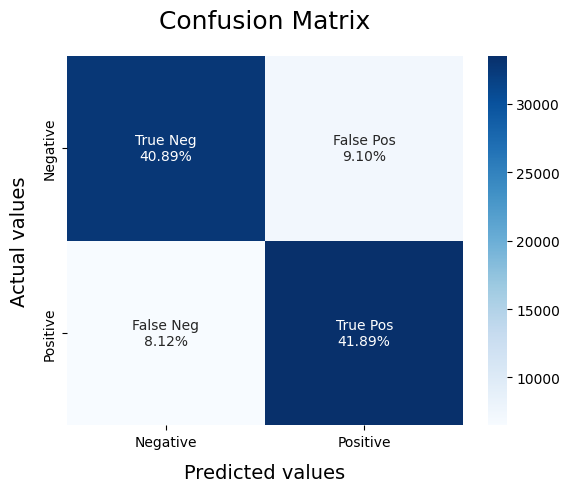

In [25]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

In [26]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

In [36]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''

    # Load the vectoriser.
    file = open('..path/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('..path/Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()

    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))

# Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()

    # Text to classify should be in a list.
    text = ["I hate facebook",
            "Hello Everyone.",
            "Mr. Stark, I care about you"]

    df = predict(vectoriser, LRmodel, text)
    print(df.head())

                          text sentiment
0              I hate facebook  Negative
1              Hello Everyone.  Positive
2  Mr. Stark, I care about you  Positive
